# SOK-1006 V25
## Forelesning 4 - Tilbuds- og etterspørselsfunksjoner med konstant elastisitet

Økonomer bruker lineære sammenhenger ganske ofte ettersom de er enkle å forstå og tegne. Man kan få ut mye intuisjon fra denne forenklingen. Når man undersøker markeder i praksis er etterspørsel/tilbud ikke nødvendigvis lineær. En form som ofte brukes i anvendt arbeid har Cobb-Douglas form:
$$ X^D = kp^{-r} \;(etterspørsel)\;\;(E)$$
$$ X^S = mp^{t} \;(tilbud)\;\;(T).$$

Her er $k, r, m, t$ alle positive tall.

**Oppgave**    
*$X^D$ er en etterspørselsfunksjon med konstant elastisitet, og $X^S$ er en tilbudsfunksjon med konstant elastisitet. Bruk elastisitetsformelen for å bekrefte dette, og finn ut hva priselastisitene til etterspørsel og tilbud er.*

Påminnelse: funksjon $X(p)$ har elastisitet $\frac{dX}{dp}\frac{p}{X}$.

In [ ]:
# skriv ditt svar her

La oss tegne noen eksempler på etterspørsel.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

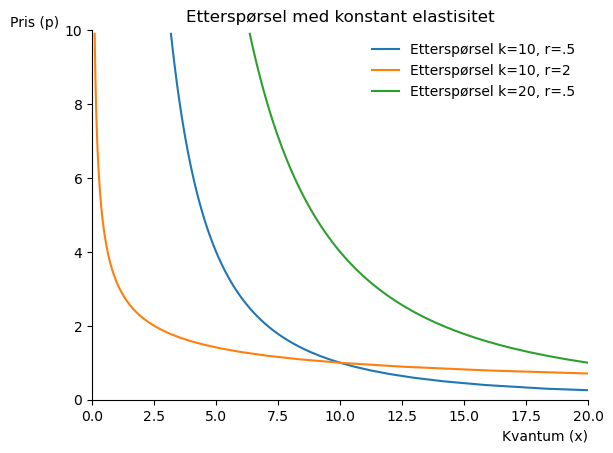

In [5]:
def demand(p, k, r):
    return k*p**(-r)

p_num=np.linspace(0.1,9.9,100)

#lag en akse

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top', rotation = 0)
                ax.set_xlabel('Kvantum (x)', loc='right')
                ax.set(xlim=(0,20))
                ax.set(ylim=(0,10))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonen

ax.plot(demand(p_num, 10, .5),p_num, label='Etterspørsel k=10, r=.5')
ax.plot(demand(p_num, 10, 2),p_num, label='Etterspørsel k=10, r=2')
ax.plot(demand(p_num, 20, .5),p_num, label='Etterspørsel k=20, r=.5')


# tittel
ax.set_title('Etterspørsel med konstant elastisitet')

#vis navnene:
ax.legend(loc='best',frameon=False);


Fordelen med å bruke en slik formulering på tilbud/etterspørsel er at vi kan snakke om prisfølsomhet *uansett* hvor vi befinner oss på disse kurvene. Er etterspørselsens priselastisitet -0.5, så kan vi si at en 1% økning i pris fører til en 0.5% reduksjon i etterspørsel uansett hvor på kurven vi befinner oss! Dette har også implikasjoner for empirisk arbeid ettersom det er nyttig å kunne estimere ett mål for prisfølsomhet som er uavhengig av kombinasjonen av pris og kvantum.     

Med etterspørsel som gitt ovenfor kan vi ta naturlige logaritmer (ln) av begge sidene:
$$ln(X^D)=ln(kp^{-r})=ln (k) + ln (p^{-r})= ln (k) -r ln (p)\tag{1}.$$

Vi kan sjekke at vi har regnet riktig på høyre siden ved hjelp av Sympy:

In [3]:
import sympy as sp

In [4]:
x, p , k, r, m, t = sp.symbols('x, p , k, r, m, t', real=True, positive=True)
ett = sp.log(k*p**(-r))
sp.expand(ett)

-r*log(p) + log(k)

Implikasjon: dersom jeg har en serie med kvantum etterspurt, og en serie med prisobservasjoner, så kan jeg estimere likning (1). Tenk at dette gir meg resultatet
$$ ln(X^D) = 10 - 0.75 ln(p)\tag{2}.$$

Tallet foran $ln(p)$ er etterspørselselastisiteten, dvs en 1% økning i pris fører til en 0.75% reduksjon i etterspørsel.    

Vi kan utvide etterspørselsfunksjonen til å inkludere inntekt, og prisen på andre varer. La $q$ være prisen på andre varer mens $y$ er inntekt. Da kan vi tenke oss at etterspørsel er gitt ved:
$$ln(X^D)=ln(kp^{-r}y^vq^w)= ln (k) -r ln (p) + v ln(y) + w ln(q)\tag{3}.$$

Her måler $v$ etterspørselens *inntektselastisitet* og $w$ er en *krysspriselastisitet*. En 1% økning i konsumentenes inntekt gir en v% økning i etterspørsel, og en 1% økning i prisen på den andre varen fører til en w% økning i etterspørsel etter godet som vi ser på.       

Vi kan sjekke at vår utregning av uttrykket i (3) stemmer:

In [14]:
v, y, w, q = sp.symbols('v, y, w, q', real=True, positive=True)
ett_ny = sp.log(k*p**(-r)*y**v*q**w)
sp.expand(ett_ny)

-r*log(p) + v*log(y) + w*log(q) + log(k)

La oss tegne våre etterspørselsfunkjsoner i logaritmisk form:

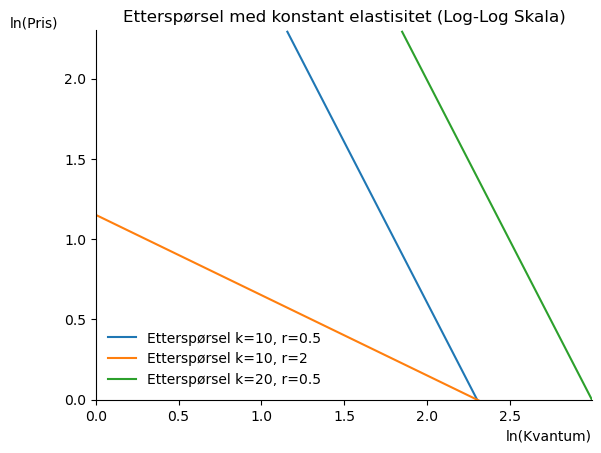

In [6]:


#  etterspørsel i naturlige logaritmer (bruk np.log)
def ln_demand(p, k, r):
    return np.log(k) - r * np.log(p)



# aksen
def create_ln_ax():
    fig, ax = plt.subplots()
    ax.set_ylabel('ln(Pris)', loc='top', rotation = 0)
    ax.set_xlabel('ln(Kvantum)', loc='right')
    ax.set(xlim=(0, np.log(20)))
    ax.set(ylim=(0, np.log(10)))
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
                
    return fig, ax


fig, ax = create_ln_ax()

# Plott 
ax.plot(ln_demand(p_num, 10, 0.5), np.log(p_num), label='Etterspørsel k=10, r=0.5')
ax.plot(ln_demand(p_num, 10, 2), np.log(p_num), label='Etterspørsel k=10, r=2')
ax.plot(ln_demand(p_num, 20, 0.5), np.log(p_num), label='Etterspørsel k=20, r=0.5')

# tittel
ax.set_title('Etterspørsel med konstant elastisitet (Log-Log Skala)')

# legend
ax.legend(loc='best', frameon=False);



Ved å bruke logaritmer er vi tilbake til "lineær" etterspørsel (dvs lineær i logaritmer).

**Oppgave**

*I 1955 estimerte [Daniel Suits](https://github.com/uit-sok-1006-v25/uit-sok-1006-v25.github.io/blob/main/artikler/suits_1955.pdf) tilbud og etterspørsel i markedet for vannmeloner i USA, og kom frem til følgende:*
$$ln(X^D)= ln(k) + 1.4ln(y) - 0.9ln(p)$$

*hvor ln(k) er konstantleddet og noen andre faktorer som er utelatt her. Identifiser og tolk elastisitetene i denne likningen.*

In [ ]:
# skriv ditt svar her

**Oppgave**

[Cooper (2003)](https://github.com/uit-sok-1006-v25/uit-sok-1006-v25.github.io/blob/main/artikler/Cooper.2003.OPECReview.PriceElasticityofDemandforCrudeOil.pdf) estimerer etterspørselen etter olje i 23 land i perioden 1971-2000. Han legger til grunn følgende likning:

\begin{equation}
   ln D_t=ln\alpha +\beta ln P_t +\gamma ln Y_t +\delta ln D_{t-1} + \epsilon_t
\end{equation}

hvor
- $D_t$ er konsum av olje per innbygger i år t
- $P_t$ er prisen på olje i år t
- $Y_t$ er BNP per innbygger i år t
- $\epsilon$  er et tilfeldig feilledd.

Her er $\beta$ etterspørselsens priselastisitet på kort sikt, mens priselastisiteten på lang sikt er gitt ved $\frac {\beta}{1-\delta}$. Med "lang sikt" menes her $D_t=D_{t-1}$.   
a) Er estimatene av etterspørselens priselastisitet på kort og lang sikt i tråd med økonomisk teori?    
b) På 1970-tallet produserte OPEC landene ca 65% av verdens olje. Hvorfor gjorde denne organisasjonen mange forsøk på å redusere tilbudet av olje?   

In [ ]:
# skriv ditt svar her

**Oppgave**

*Gjør oppgavene fra [Core Project 7](https://www.core-econ.org/doing-economics/book/text/07-01.html#introduction). Her møter du igjen Suit sin modell for tilbud av og etterspørsel etter vannmeloner. Se foreløpig bort fra oppgave 3c i delkap 7.1 (overskuddsbetraktninger kommer vi tilbake til i kap 9). Her lærer du noe mer om hvordan man fremstiller tilbud og etterspørsel basert på faktisk data, tolkning av empiriske resultater, og hvordan man modellerer skift i kurvene.Det refereres til et paper av Stewart som du kan laste ned [her](https://github.com/uit-sok-1006-v25/uit-sok-1006-v25.github.io/blob/main/artikler/KenStewart.pdf).*       

*Løs oppgavene ved hjelp av Python.*  

*Med følgende kode kan du laste ned dataene som brukes i denne oppgaven.*    


In [1]:
import pandas as pd

df=pd.read_csv("https://uit-sok-1006-v25.github.io/suits_watermelons.csv",delimiter=";")


In [2]:
df

,Year,log q,log h,log p,log p_c,log p_v,log w,log n,log(y/n),log p_f
0,1930,4.448623,4.379545,4.761777,2.247338,0.845054,3.366401,4.812434,6.403531,2.535163
1,1931,4.356519,4.333493,4.614410,1.733858,2.726278,3.136141,4.819342,6.244651,2.546676
2,1932,4.204548,4.054879,4.368032,1.874316,2.588122,2.832198,4.826250,5.966037,2.599635
3,1933,4.031853,4.008827,4.531517,2.318718,2.286482,2.772330,4.833157,5.896959,2.645687
4,1934,4.096325,4.094023,4.644344,2.514439,1.475967,2.917394,4.840065,6.018996,2.624964
5,1935,4.195337,4.156193,4.563753,2.406217,1.892737,2.970354,4.844670,6.129521,2.710160
6,1936,4.135470,4.128562,4.851578,2.514439,1.897342,2.995683,4.853881,6.246954,2.703252
7,1937,4.262113,4.225271,4.662765,2.129905,2.079248,3.113115,4.858486,6.311427,2.705555
8,1938,4.259810,4.202245,4.690396,2.150628,3.044037,3.090089,4.865394,6.226230,2.753910
9,1939,4.144680,4.137772,4.777895,2.208193,1.701621,3.113115,4.874604,6.288401,2.691739


In [ ]:
#Variable	Description
#Year	Year (1930-1951)
#log q (Q)	Total number of watermelons available for harvest (millions)
#log h (X)	Watermelons harvested (millions)
#log p (P)	Average farm price of watermelons ($ per 1000)
#log p_c (C)	Average annual net farm receipts per pound of cotton (dollars)
#log p_v (T)	Average farm price of vegetables (index)
#log w (W)	Farm wage rates in the South Atlantic States (index)
#log n (N)	US population 
#log(y/n) (Y/N)	Per capita disposable income ($)
#log p_f (F)	Railway freight costs for watermelons (index)

# skriv ditt svar her